In [5]:
from importlib import reload
import kc_functions as kc

/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# df=pd.read_csv('data/2014/accident.csv')

In [8]:
# df.info()

In [4]:
# def getDistFromRow(dftmp,loc):
#     location=['LONGITUD','LATITUDE']
#     return np.linalg.norm(dftmp.loc[:,location]-loc,axis=1)
# 
# def LookupLocations(state,county,city,dflookup):
#     if dflookup is None:
#         dflookup=pd.read_csv(basefile,sep='|')
#     return dflookup.loc[(dflookup.STATE_NUMERIC==state) & (dflookup.COUNTY_NUMERIC==county),['PRIM_LONG_DEC','PRIM_LAT_DEC']].median()
# def fillLocations(dftmp,basefile='data/NationalFile_20190501.txt'):
#     dflup=pd.read_csv(basefile,sep='|')
#     state=dftmp.columns.tolist('STATE')
#     county=dftmp.columns.tolist('COUNTY')
#     city=dftmp.columns.tolist('CITY')
#     for i,v in dftmp.loc[(dftmp.LATITUDE>=99) & (dftmp.LONGITUD>=999),:].iterrows():
#         loc=LookupLocations(state,county,city,dflup)

### Binarize, cluster, and test for significance example - workflow

In [25]:
reload(kc)

df=kc.getalldata()
# need to add a merge to figure out how to merge sub-tables together into 1 row
df=kc.removeNoHourAndMinutes(df)
df=kc.createTimestamp(df)
df=kc.removeUnneededColumns(df)
df=kc.cleanLocs(df)

In [64]:
#kc.calculateTopNCatPct(df)
reload(kc)
kc.calculateTopNCatPct(df)

,variable,percent
0,state,0.394148
1,county,0.141392
2,city,0.539595
3,peds,0.999700
4,route,0.950530
5,harm_ev,0.760884
6,man_coll,0.994230
7,reljct2,0.977835
8,typ_int,0.998123
9,lgt_cond,0.996607


In [66]:
df.head().T

,0,1,2,3,4
latitude,34.6237,34.3974,33.1972,33.1964,34.1802
longitud,-85.9814,-87.7721,-87.5259,-86.3078,-86.7846
state,1,1,1,1,1
county,71,59,125,121,43
city,0,0,3050,2275,0
day,1,1,1,2,2
month,1,1,1,1,1
hour,1,13,3,9,16
peds,0,0,0,0,0
route,4,4,2,2,4


In [5]:
# df=kc_functions.binarizeVariables(df)
# df.info()

In [68]:
print(df.memory_usage(deep=True).sum())
#df.head().T

28961038


In [292]:
reload(kc)
hdbscan_params={'min_cluster_size':100,'gen_min_span_tree':False, 'metric':'manhattan'}
dfwk=kc.cluster_all_points(df,df.harm_ev==1,hdbscan_params=hdbscan_params)
dfwk=kc.ttest(dfwk,dfwk.harm_ev==1)
dfwk=kc.signficant_clusters(dfwk,True)

In [294]:
# reload(kc_functions)
# kc_functions.output_notebook()
#kc_functions.plot_map(dfwk)

In [295]:
# kc_functions.plot_map(dfwk,dfwk.cluster,dfwk.harm_ev==1)

In [296]:
dfwk=dfwk.loc[:,['id','cluster','label','tstat','pvalue','sig']]

In [300]:
# import tabpy as tabpy
reload(tabpy)

sigcluster,cluster,pvalue=tabpy.get_sig_clusters(df.longitud.values,df.latitude.values,(df.harm_ev==1).values,min_cluster_size=100,test_type='ttest')

{'min_cluster_size': 100, 'metric': 'manhattan', 'min_samples': 100}


In [301]:
all(dfwk['cluster']==sigcluster)

True

TypeError: '<' not supported between instances of 'list' and 'float'

In [26]:
import hdbscan

dfwk=df.loc[df.WRK_ZONE==1,LOCS]
clusterer = hdbscan.HDBSCAN(min_cluster_size=300, gen_min_span_tree=True,metric='manhattan')
clusterer.fit(dfwk)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='manhattan', min_cluster_size=300, min_samples=None, p=None,
    prediction_data=False)

In [11]:
# plot_map(dfwk,clusterer.labels_,title='Fatal Accident Road condition Clusters')

In [214]:
# Workflow example
# z=cluster_all_points(df,df.WRK_ZONE==1)
# z=ttest(z,z.WRK_ZONE==1)
# z=signficant_clusters(z,2)

In [215]:
# z.cluster.value_counts()

## Workflow Example

In [14]:
df=getalldata()
#df=mergedata(df)
#df=cleanDFLocs(df)

In [ ]:
dfwk.cluster.value_counts()

In [ ]:
dfwk=create_plot_labels(dfwk)

In [ ]:
plot_map(dfwk,dfwk.plot_labels,title='Fatal Accident Road condition Clusters')

## End Example

In [122]:
#plot_map(dftmp,dftmp.cluster)

In [125]:
z=dfwk.loc[dfwk.cluster==3,LOCS]
hull=convexhull(z)
#hull=spatial.ConvexHull(z)
hull.close()

In [126]:
points=z.loc[:,LOCS].values

In [127]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.plot(points[:,0],points[:,1],'bo')
plt.show()

In [128]:
z=df.loc[hull.in_hull(df.loc[:,LOCS].values),:]

In [129]:
from scipy.stats import ttest_ind

In [109]:
#ttest_ind(z.accident_WRK_ZONE,dfwk.loc[dfwk.cluster==-1,'accident_WRK_ZONE'])

In [16]:
# LOCS=['accident_LONGITUD', 'accident_LATITUDE','cluster']
# z.loc[:,LOCS].head()

In [139]:
df.loc[:,LOCS].head()

,accident_LONGITUD,accident_LATITUDE
0,-85.981408,34.623722
1,-87.772117,34.397428
2,-87.525911,33.197172
3,-86.307831,33.196383
4,-86.784592,34.180189


In [102]:
a=df.loc[~hull.in_hull(df.loc[:,LOCS].values),:]

In [18]:
# df.head().reset_index()

In [20]:
# df.loc[~hull.in_hull(df.loc[:,LOCS].values),'accident_WRK_ZONE'].mean()

In [94]:
df=getalldata()
# need to add a merge to figure out how to merge sub-tables together into 1 row
df=removeNoHourAndMinutes(df)
df=removeUneededAccidentColumns(df)
df=cleanLocs(df)
df=createTimestamp(df)

df2=getalldata()
# need to add a merge to figure out how to merge sub-tables together into 1 row
df2=removeNoHourAndMinutes(df2)
df2=removeUneededAccidentColumns(df2)
df2=cleanLocs(df2)
df2=createTimestamp(df2)
df=df.append(df2)
df=df.reset_index().drop('index',axis=1)

In [22]:
# print(df.shape)
# print(len(df.reset_index()['index'].unique()))
# print(len(df.reset_index().drop('index',axis=1).reset_index()['index'].unique()))
# df.sort_values('id').head()

In [6]:
reload(kc_functions)
df=kc_functions.getalldata()
df=kc_functions.removeNoHourAndMinutes(df)
df=kc_functions.createTimestamp(df)
df=kc_functions.removeUneededColumns(df)
df['target']=df['drunk_dr']

In [9]:
import pandas as pd
import kc_functions
df=pd.read_csv('comboacc.csv')
df.columns=[ i.lower() for i in df.columns.tolist()]
#df=kc_functions.removeNoHourAndMinutes(df)
#df=kc_functions.cleanLocs(df)
df['target']=df['sp_jur']
df.target.unique()

array([0, 9, 3, 5, 1, 8, 2, 4])

In [13]:
# ```SCRIPT_INT('from scipy.spatial import Delaunay, ConvexHull -- for Tabpy - pure significance test clustering
from scipy.spatial import Delaunay,ConvexHull
from scipy.stats import ttest_ind
from scipy.spatial.qhull import QhullError
import pandas as pd
import hdbscan
import numpy as np

def in_hull(h,p):
    hull_in=Delaunay(h.points)
    return hull_in.find_simplex(p)>=0

LOCS=df.loc[:,["longitud","latitude","target"]]
# Assuming each row is unique
#LOCS = np.column_stack([np.radians(_arg1),np.radians(_arg2), _arg3]) 
uniquedf=pd.DataFrame(LOCS,columns=["longitud","latitude","target"])
# uniquedf is the uniques
targetdf = uniquedf.loc[uniquedf["target"]==1,:]
# clusterer = hdbscan.HDBSCAN(min_cluster_size=500,gen_min_span_tree=True,metric="manhattan",min_samples=500)
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,gen_min_span_tree=True,metric="manhattan",min_samples=5)
clustered = clusterer.fit(targetdf.loc[:,["longitud","latitude"]])
targetdf["cluster"]=clustered.labels_
uniquedf["cluster"]=0
# relabel cluster 0 so when we multiply it out to indicate significant clusters, it works - adding 1 to everything
uniquedf.loc[list(targetdf.index),"cluster"]=clustered.labels_ + 1
for i in uniquedf["cluster"].unique():
    if i!=0:
        dftgt=uniquedf.loc[uniquedf["cluster"]==i,["longitud","latitude"]]
        try:
            hull=ConvexHull(dftgt)
        except Exception as Err:
            hull=None
            if type(Err) == QhullError:
                if len(dftgt.longitud.unique())<3 and len(dftgt.latitude.unique())<3:
                    for lon,lat in zip(dftgt.longitud.unique(),dftgt.latitude.unique()):
                        uniquedf.loc[(uniquedf.longitud==lon) & (uniquedf.latitude==lat),"cluster"]==i
                else:
                    print(Err.args)   # True error here - we"ll have ot know about about it - not sure how you display it in tableau
        if hull is not None:
            hull.close()
            uniquedf.loc[in_hull(hull,uniquedf.loc[:,["longitud","latitude"]].values),"cluster"]=i
# ttest - no need for any correction because it"s different data sets
dfnotincluster=uniquedf.loc[uniquedf["cluster"]==0,"target"]
uniquedf["tstat"]=-1
uniquedf["pvalue"]=-1
for i in uniquedf["cluster"].unique():
    if i!=0:
        dfcluster=uniquedf.loc[uniquedf["cluster"]==i,"target"]
        tstat,pvalue=ttest_ind(dfcluster,dfnotincluster)
        uniquedf.loc[uniquedf["cluster"]==i,["tstat"]]=tstat
        uniquedf.loc[uniquedf["cluster"]==i,["pvalue"]]=pvalue
# now, check for significance
# uniquedf["sig"]=uniquedf.pvalue<= 0.05 
uniquedf["sig"]=uniquedf.pvalue<=.05
uniquedf["sig_cluster"]=uniquedf.cluster*uniquedf.sig


# Showing certain clusters show up as significant that have no difference (likely due to chance). 
# ',
# avg([Longitud]), 
# avg([Latitude]),
# avg([Measure Chooser]),
# min([# of clusters]))```

/home/kchuangk/.pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


QhullError: QH6013 qhull input error: input is less than 2-dimensional since it has the same x coordinate

While executing:  | qhull i Qt
Options selected for Qhull 2015.2.r 2016/01/18:
  run-id 1991766488  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  0  Error-roundoff 7.2e-13  _one-merge 3.6e-12
  _near-inside 1.8e-11  Visible-distance 1.4e-12  U-coplanar-distance 1.4e-12
  Width-outside 2.9e-12  _wide-facet 8.6e-12


In [15]:
# Final for Tabpy

from scipy.spatial import Delaunay, ConvexHull
from scipy.stats import ttest_ind
from scipy.spatial.qhull import QhullError
import pandas as pd
import hdbscan

def in_hull(h,p):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    hull_in=Delaunay(h.points)
    return hull_in.find_simplex(p)>=0

LOCS=df.loc[:,['longitud','latitude','target']]
# Assuming each row is unique
# TABPY LOCS = np.column_stack([np.radians(_arg1),np.radians(_arg2), _arg3]) 
uniquedf=pd.DataFrame(LOCS,columns=['longitud','latitude','target'])
# uniquedf is the uniques
targetdf = uniquedf.loc[uniquedf['target']==1,:]
clusterer = hdbscan.HDBSCAN(min_cluster_size=5,gen_min_span_tree=True,metric="manhattan",min_samples=5)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=_arg4[1],gen_min_span_tree=True,metric="manhattan",min_samples=_arg5[1])
clustered = clusterer.fit(targetdf.loc[:,['longitud','latitude']])
targetdf['cluster']=clustered.labels_
uniquedf['cluster']=0
# relabel cluster 0 so when we multiply it out to indicate significant clusters, it works - adding 1 to everything
uniquedf.loc[list(targetdf.index),'cluster']=clustered.labels_ + 1
for i in uniquedf['cluster'].unique():
    if i!=0:
        dftgt=uniquedf.loc[uniquedf['cluster']==i,['longitud','latitude']]
        try:
            hull=ConvexHull(dftgt)
        except Exception as Err:
            hull=None
            if type(Err) == QhullError:
                if len(dftgt.longitud.unique())<3 and len(dftgt.latitude.unique())<3:
                    for lon,lat in zip(dftgt.longitud.unique(),dftgt.latitude.unique()):
                        uniquedf.loc[(uniquedf.longitud==lon) & (uniquedf.latitude==lat),'cluster']==i
                else:
                    print(Err.args)   # True error here - we'll have ot know about about it - not sure how you display it in tableau
        if hull is not None:
            hull.close()
            uniquedf.loc[in_hull(hull,uniquedf.loc[:,['longitud','latitude']].values),'cluster']=i
# ttest - no need for any correction because it's different data sets
dfnotincluster=uniquedf.loc[uniquedf['cluster']==0,'target']
uniquedf['tstat']=-1
uniquedf['pvalue']=-1
for i in uniquedf['cluster'].unique():
    if i!=0:
        dfcluster=uniquedf.loc[uniquedf['cluster']==i,'target']
        tstat,pvalue=ttest_ind(dfcluster,dfnotincluster)
        uniquedf.loc[uniquedf['cluster']==i,['tstat']]=tstat
        uniquedf.loc[uniquedf['cluster']==i,['pvalue']]=pvalue
# now, check for significance
uniquedf['sig']=uniquedf.pvalue<= 0.03 
# TABPY uniquedf['sig']=uniquedf.pvalue<=_arg6[1]
uniquedf['sig_cluster']=uniquedf.cluster*uniquedf.sig

# PLEASE READ: basically cluster 0 means it's not a cluster - everythign else, it's in a cluster
# fulldf has every single point (repeated) - cluster is the cluster it is in 0 means not in a cluster or significant cluster, -2 means repeated
# uniquedf has only the unique points - sig_cluster is the significant cluster 0 means it's not in a cluster, cluster = cluster from hdbscan (no significance)
# return uniquedf['sig']

/home/kchuangk/.pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
# kc_functions.output_notebook()
# kc_functions.plot_map(uniquedf,uniquedf.cluster)

In [26]:
# kc_functions.plot_map(uniquedf,uniquedf.sig_cluster) #,uniquedf.target)

### Data Merge

In [111]:
varlist=getVarlist()

In [11]:
varlist

In [28]:
# reload(kc_functions)
# a=kc_functions.createHistograms('accident.csv')

In [201]:
# we should probably just bin the Vehicle Number

In [202]:
df=getalldata('person.csv')

In [218]:
z=df.loc[:,varlist['person']].groupby('id')['per_no'].count()
(z.value_counts()/z.shape[0]).values.cumsum()

array([0.38010776, 0.65283572, 0.82420263, 0.90564561, 0.94857473,
       0.97152498, 0.98336487, 0.99001436, 0.9934417 , 0.99558474,
       0.99693743, 0.99779617, 0.99825973, 0.99858651, 0.99881449,
       0.99901208, 0.99920966, 0.99932365, 0.99939965, 0.99946804,
       0.99952124, 0.99957443, 0.99960483, 0.99963523, 0.99966563,
       0.99969602, 0.99971882, 0.99974162, 0.99976442, 0.99977962,
       0.99979482, 0.99981001, 0.99982521, 0.99984041, 0.99985561,
       0.99987081, 0.99988601, 0.99990121, 0.99991641, 0.99992401,
       0.99993161, 0.9999392 , 0.9999468 , 0.9999544 , 0.999962  ,
       0.9999696 , 0.9999772 , 0.9999848 , 0.9999924 , 1.        ])

## EDA

In [30]:
# kc_functions.output_notebook()
# kc_functions.createHistograms('accident.csv')

In [32]:
# kc_functions.createHistograms('damage.csv')

In [34]:
# kc_functions.createHistograms('vision.csv')

In [36]:
# kc_functions.createHistograms('drimpair.csv')

In [38]:
# kc_functions.createHistograms('factor.csv')

In [40]:
# kc_functions.createHistograms('person.csv')

In [42]:
# kc_functions.createHistograms('acc_aux.csv')

In [44]:
# from bokeh.models.annotations import Span
# 
# k=[i/100 for i in range(0,int(2*np.pi*100),10)]
# z=np.sin(k)
# 
# p=kc_functions.figure(tooltips=[('x','$x'),('y','$y')])
# p.line(x=k,y=z,legend='sin')
# p.circle(x=k,y=z,legend='sin',radius=0.10,fill_color=None)
# s=Span(location=0,dimension='width',line_width=1,line_color='darkred',line_dash='dotted')
# p.add_layout(s)
# s=Span(location=3,dimension='height',line_width=1,line_color='navy',line_dash='dashed')
# p.add_layout(s)
# kc_functions.show(p)

### Create Functions to merge data for EDA in R

In [2]:
# load values for R
import kc_functions
from importlib import reload
reload(kc_functions)
accident=kc_functions.getalldata('accident.csv')
accident=kc_functions.removeNoHourAndMinutes(accident)
accident=kc_functions.cleanLocs(accident)
accident=kc_functions.createTimestamp(accident)
accident=kc_functions.removeUnneededColumns(accident,'accident.csv',['tstamp'])
vehicle=kc_functions.getalldata('vehicle.csv')
vehicle=kc_functions.removeUnneededColumns(vehicle,'vehicle.csv')
veh_aux=kc_functions.getalldata('veh_aux.csv')
veh_aux=kc_functions.removeUnneededColumns(veh_aux,'veh_aux.csv')

/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3209: DtypeWarning: Columns (101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [3]:
accident=accident.set_index('id')
vehicle.loc[:,'tstamp']=accident.loc[list(vehicle.id),'tstamp'].values
vehicle.loc[:,'state']=accident.loc[list(vehicle.id),'state'].values
vehicle.loc[:,'longitud']=accident.loc[list(vehicle.id),'longitud'].values
vehicle.loc[:,'latitude']=accident.loc[list(vehicle.id),'latitude'].values
veh_aux.loc[:,'state']=accident.loc[list(veh_aux.id),'state'].values
veh_aux.loc[:,'tstamp']=accident.loc[list(veh_aux.id),'tstamp'].values
veh_aux.loc[:,'longitud']=accident.loc[list(veh_aux.id),'longitud'].values
veh_aux.loc[:,'latitude']=accident.loc[list(veh_aux.id),'latitude'].values

/home/kchuangk/.pyenv/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [4]:
vehicle=vehicle.loc[(~vehicle.tstamp.isnull()) | (~vehicle.longitud.isnull()) | (~vehicle.latitude.isnull()),:]
veh_aux=veh_aux.loc[(~veh_aux.tstamp.isnull()) | (~veh_aux.longitud.isnull()) | (~veh_aux.latitude.isnull()),:]

In [5]:
vehicle.to_csv('kc_eda_vehicle.csv')
veh_aux.to_csv('kc_eda_veh_aux.csv')

The rest of the EDA is done in R

### EDA Tranformations below

We'll code only examining vehicles 1-4 (~94% of all accidents) and vehicles 1-4 covers 98-99% of variables

We'll code each categorical variable as veh_no_(1-4)_categorical_var_1,veh_no_(1-4)_categorical_var_2, and so on and numerical as veh_no_(1-4)_numericVar.

Note veh_aux doesn't have vehicle number.

In [104]:
from importlib import reload
import pandas as pd
import kc_functions as kc

In [106]:
# dforig=pd.read_csv('kc_eda_vehicle.csv')
# df=dforig.copy()
# cols=[i for i in df.columns.tolist() if i not in ['tstamp','longitud','latitude','Unnamed: 0']]
# df=df.loc[:,cols]
# df=df.loc[(df.veh_no<=4),:]
# df['veh_no']=['veh'+str(i) for i in df.veh_no]
# df=df.drop('state',axis=1)

In [108]:
from importlib import reload
import numpy as np
import kc_functions as kc
reload(kc)

<module 'kc_functions' from '/home/kchuangk/Documents/Classes/W210 - Capstone/NYCTrafficCollisions/kc/kc_functions.py'>

In [110]:
reload(kc)
#kc.createDataDictForTranslation()
vehicle=kc.getalldata('vehicle.csv')
vehicle=kc.removeUnneededColumns(vehicle,'vehicle')
vehicle=vehicle.drop(['unittype','spec_use','underride', 'vpavetype'],axis=1)   # columns dropped from lack of variance in additional EDA
# map the variables into bins/translations
vehicle=vehicle.loc[(vehicle.veh_no<=4),:]
vehicle=kc.translateVarsFromDict(vehicle,kc.createDataDictForTranslation('vehicle'))
vehicle['veh_no']=['veh'+str(int(i)) for i in vehicle.veh_no]
vehicle=kc.pivot_and_chunk(vehicle)

/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


KeyError: "['underride' 'vpavetype'] not found in axis"

In [ ]:
vehicle.columns

In [ ]:
# remove variables not to expand
cols=vehicle.columns.tolist()
for k,v in kc.createDataDictForTranslation().items():   # filtering out only columns to be binarized
    if k in kc.checkDataDictForType(SourceFile='vehicle',return_type='numeric'):
        for i in range(1,5):
            cols.remove(k+'$veh'+str(i))

In [ ]:
# binarize the variables
vehicle=kc.binarizeVariables(vehicle,cols,500)
# vehicles is ready for merging
vehicle.head()

# **PLEASE LOOK - Use the workflow below to process to file as a template**

In [5]:
from importlib import reload
import kc_functions as kc
reload(kc)

<module 'kc_functions' from '/home/kchuangk/Documents/Classes/W210 - Capstone/NYCTrafficCollisions/kc/kc_functions.py'>

In [7]:
from importlib import reload
import kc_functions as kc

reload(kc)
#kc.createDataDictForTranslation()
vehicle=kc.getalldata('vehicle.csv')
vehicle=kc.removeUnneededColumns(vehicle,'vehicle')
vehicle=vehicle.drop(['unittype','spec_use','underide','vpavetyp'],axis=1)   # columns dropped from lack of variance in additional EDA
# map the variables into bins/translations
vehicle=vehicle.loc[(vehicle.veh_no<=4),:]
vehicle=kc.translateVarsFromDict(vehicle,kc.createDataDictForTranslation('vehicle'))
vehicle['veh_no']=['veh'+str(int(i)) for i in vehicle.veh_no]
vehicle=kc.pivot_and_chunk(vehicle)
# remove variables not to expand
cols=vehicle.columns.tolist()
for k,v in kc.createDataDictForTranslation().items():   # filtering out only columns to be binarized
    if k in kc.checkDataDictForType(SourceFile='vehicle',return_type='numeric'):
        for i in range(1,5):
            cols.remove(k+'$veh'+str(i))
vehicle=kc.binarizeVariables(vehicle,cols,500)    # binarize the columns
vehicle=kc.addSummaryStats(vehicle,functions=[np.nanmean,np.nansum,np.any],postfixes=['mean','sum','any']).replace({True:1,False:0})

/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/Documents/Classes/W210 - Capstone/NYCTrafficCollisions/kc/kc_functions.py:490: RuntimeWarning: Mean of empty slice
  dftmp[z.group(1)+'$'+z.group(2) + '$' + c]=f(r,axis=1)


In [9]:
#vehicle.head().T

In [10]:
# procedure to load the file all the way to prepped

reload(kc)
veh_aux=kc.getalldata('veh_aux.csv')  # load all year's data and add id
veh_aux=kc.removeUnneededColumns(veh_aux,'veh_aux',['veh_no'])  # keep veh_no
#veh_aux=kc.drop([],axis=1) # drop additional columns from deeper EDA for lack of variance ien the variables
veh_aux=veh_aux.loc[(veh_aux.veh_no<=4),:]    # filter only veh_no <=4
veh_aux=kc.translateVarsFromDict(veh_aux,kc.createDataDictForTranslation('veh_aux'))   #remap the values from FARS to ours own values
veh_aux['veh_no']=['veh'+str(int(i)) for i in veh_aux.veh_no]    # make veh_no a string instead
veh_aux=kc.pivot_and_chunk(veh_aux)    # pivot the veh_no from values into columns headers (expanding number of columns by columns * veh_no.unique()
cols=veh_aux.columns.tolist()          # Filtering out columns to binarized -- only categorical columns
for k,v in kc.createDataDictForTranslation().items():
    if k in kc.checkDataDictForType(SourceFile='veh_aux',return_type='numeric'):
        for i in range(1,5):
            cols.remove(k+'$veh'+str(i))
veh_aux=kc.binarizeVariables(veh_aux,cols,500)    # binarize the columns
veh_aux=kc.addSummaryStats(veh_aux,functions=[np.nanmean,np.nansum,np.any],postfixes=['mean','sum','any']).replace({True:1,False:0})

In [11]:
#veh_aux.head()
veh_aux.head()

,a_drdro$veh1_No,a_drdro$veh1_Drowsy Driver,a_drdro$veh2_No,a_drdro$veh2_Drowsy Driver,a_drdro$veh3_No,a_drdro$veh3_Drowsy Driver,a_drdro$veh4_No,a_drdro$veh4_Drowsy Driver,"a_imp1$veh1_Front 26,495 28,055 27,753 27,373 29,963","a_imp1$veh1_Non-Collision 3,442 3,426 3,144 3,084 3,262",...,"a_imp1$Left Side 4,511 4,590 4,369 4,504 4,841$any","a_imp1$Non-Collision 3,442 3,426 3,144 3,084 3,262$mean","a_imp1$Non-Collision 3,442 3,426 3,144 3,084 3,262$sum","a_imp1$Non-Collision 3,442 3,426 3,144 3,084 3,262$any",a_lic_s$Invalid$mean,a_lic_s$Invalid$sum,a_lic_s$Invalid$any,a_lic_s$Not Applicable$mean,a_lic_s$Not Applicable$sum,a_lic_s$Not Applicable$any
id,,,,,,,,,,,,,,,,,,,,,
id_2014.100001,1,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0.25,1,1,0.0,0,0
id_2014.100002,1,0,1,0,0,0,0,0,1,0,...,0,0.0,0,0,0.00,0,0,0.0,0,0
id_2014.100003,1,0,1,0,0,0,0,0,0,0,...,1,0.0,0,0,0.25,1,1,0.0,0,0
id_2014.100004,1,0,1,0,0,0,0,0,1,0,...,0,0.0,0,0,0.25,1,1,0.0,0,0
id_2014.100005,1,0,0,0,0,0,0,0,1,0,...,0,0.0,0,0,0.00,0,0,0.0,0,0


In [12]:
print(len(vehicle.reset_index().id.unique())==vehicle.shape[0])
print(vehicle.shape[0])

True
131585


In [13]:
print(len(veh_aux.reset_index().id.unique())==veh_aux.shape[0])
print(veh_aux.shape[0])

True
131585


#### Merging with accident file

In [14]:
accident=kc.getalldata()
accident=kc.removeNoHourAndMinutes(accident)
accident=kc.cleanLocs(accident)
accident=kc.createTimestamp(accident)

In [15]:
accident=kc.removeUnneededColumns(accident)

In [16]:
accident.shape

(129979, 19)

In [17]:
accident=accident.set_index('id')
accident=accident.join(vehicle,how='left')

In [18]:
accident=accident.join(veh_aux,how='left')

In [19]:
accident.shape

(129979, 1302)

In [20]:
# check for duplicates
any(accident.reset_index().id.duplicated())

False

In [21]:
accident.to_parquet('kc_accident_vehicle_veh_aux.parquet')
accident.to_csv('kc_accident_vehicle_veh_aux.csv')

### create function so it vertically aligns the "any"s

In [3]:
import re
import numpy as np
import pandas as pd
import kc_functions as kc
accident=pd.read_parquet('kc_accident_vehicle_veh_aux.parquet')
accident=accident.loc[:,[i for i in accident.columns.tolist() if re.search('.*?\$.*?\$any$',i)]]
# make accident in long form, break out the 2 variable$category into 2 columns, sort it
accident=accident.reset_index().melt(id_vars='id',var_name='full').assign(variable=lambda x: [ re.search('(.*?)(?:\$.*$)',i).group(1) for i in x.full],
                                                                         category=lambda x: [re.search('(?:.*?\$)(.*?)(?:\$any$)',i).group(1) for i in x.full]) \
                .sort_values(by='id') # .drop('full',axis=1)
# move category of the variable back to columns and use value as the values
# accident=accident.assign(idcat=lambda x: str(x.id) + '$'+ str(x.variable)) \
#                 .drop(['id','variable'],axis=1).set_index('idcat')
# accident=accident.pivot(columns='category',values='value').to_sparse().reset_index()
# accident=accident.assign(id=lambda x: [ re.search('(^id.*?)(?:\$.*)',i).group(1) for i in x.idcat],
#                        category=lambda x: [re.search('(?:^id.*?\$)(.*$)',i).group(1) for i in x.idcat]).drop('idcat',axis=1)
# accident.to_parquet('kc_accident_vehicle_veh_aux_filtered_any.parquet')
accident.to_csv('kc_accident_vehicle_veh_aux_filtered_any.csv')

/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### create a list of variable where sd > 0 from any's (ie. it's not all the same number) - add 'state' to it. The output csv is used to help the creation of the Correlations Table.

In [165]:
from importlib  import reload
import numpy as np
import pandas as pd
import kc_functions as kc
import re

#df=pd.read_csv('kc_tmp.csv')
df=pd.read_parquet('kc_accident_vehicle_veh_aux.parquet')
z=df.loc[:,[i for i in df.columns.tolist() if re.search('any$',i)]]
k=z.apply(np.std,axis=0)
c=k[k>0].index.tolist()
c.append('state')
df.loc[:,c].to_csv('kc_tmp.csv')

### Attempt to caculate Correlations

In [14]:
from importlib import reload
import kc_functions as kc
reload(kc)

df=pd.read_csv('kc_tmp.csv').set_index('id')
df['state']=df.state
df=kc.calcCorrMatrix(df)  # probably better to use kendall's tau since there are NAs
df.to_csv('kc_corr.csv')

All Records
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 1.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 2.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 4.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 5.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 6.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 8.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 9.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 10.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 11.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State: 12.0
Progress  |██████████████████████████████████████████████████| 100.0% Complete
State:

In [3]:
import re
df=pd.read_csv('kc_corr.csv').drop(['Unnamed: 0','full'], \
                                   axis=1).assign(correlation=lambda x: \
                                                  [ float(re.search(r'(?:correlation=)(.*?),.*',str(i)).group(1))  \
                                                   if re.search(r'(?:correlation=)(.*?),.*',str(i)) else 0 \
                                                   for i in x.value ],
                                                 pvalue=lambda x:
                                                 [ float(re.search(r'(?:pvalue=)(.*?)\)$',str(i)).group(1)) \
                                                  if re.search(r'(?:pvalue=)(.*?)\)$',str(i)) else 1 \
                                                  for i in x.value])

In [135]:
# df.loc[(df.pvalue<1) & (df.state==0) & (df.correlation>0) & (df.correlation<1.5) & \
#        ([False if re.search('[model|]',i) else True for i in df.prim_var]) & \
#        ([False if re.search('[model|]',i) else True for i in df.variable])  \
#        ,:].sort_values('correlation',ascending=False)

In [133]:
#df.loc[([True if re.search('rollover',i) else False for i in df.prim_var]) \
#       and  ([False if re.search('rollover',i) else True for i in df.variable]),:].sort_values('correlation')

,prim_var,variable,value,state,full
0,trav_sp$$any,trav_sp$$any,NaN,0.0,trav_sp$$any-trav_sp$$any
1,owner$Private Owner$any,trav_sp$$any,"(0.06677620998512014, 4.670048914648315e-128)",0.0,owner$Private Owner$any-trav_sp$$any
2,m_harm$Moving Vehicle$any,trav_sp$$any,"(0.05254889438884251, 4.8671268721989235e-80)",0.0,m_harm$Moving Vehicle$any-trav_sp$$any
3,owner$Business/Government/Company Vehicle$any,trav_sp$$any,"(0.012403656512436459, 7.758038271703741e-06)",0.0,owner$Business/Government/Company Vehicle$any-...
4,m_harm$Other$any,trav_sp$$any,"(-0.02928161652504676, 4.7359779676803e-26)",0.0,m_harm$Other$any-trav_sp$$any


#### Other

In [5]:
from importlib import reload
import numpy as np
import pandas as np
import kc_functions as kc
reload(kc)

/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<module 'kc_functions' from '/home/kchuangk/Documents/Classes/W210 - Capstone/NYCTrafficCollisions/kc/kc_functions.py'>

In [7]:
df=pd.read_parquet('kc_accident_vehicle_veh_aux.parquet')

In [9]:
vehicle=kc.getalldata('vehicle.csv')
vehicle=kc.removeUnneededColumns(vehicle,'vehicle')
vehicle=vehicle.drop(['unittype','spec_use','underide','vpavetyp'],axis=1)   # columns dropped from lack of variance in additional EDA
# map the variables into bins/translations
vehicle=vehicle.loc[(vehicle.veh_no<=4),:]
vehicle=kc.translateVarsFromDict(vehicle,kc.createDataDictForTranslation('vehicle'))
vehicle['veh_no']=['veh'+str(int(i)) for i in vehicle.veh_no]

/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (36,37,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kchuangk/.pyenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (101,102) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


NameError: name 'v' is not defined

In [10]:
vehicle.columns.tolist()

['veh_no',
 'numoccs',
 'hit_run',
 'reg_stat',
 'owner',
 'make',
 'model',
 'body_typ',
 'mod_year',
 'gvwr',
 'trav_sp',
 'rollover',
 'rolinloc',
 'deformed',
 'm_harm',
 'vtrafway',
 'vnum_lan',
 'vspd_lim',
 'valign',
 'vprofile',
 'vsurcond',
 'vtrafcon',
 'vtcont_f',
 'p_crash1',
 'p_crash2',
 'p_crash3',
 'pcrash4',
 'pcrash5',
 'acc_type',
 'id']

In [16]:
vehicle.body_typ.value_counts()/vehicle.shape[0]

4-Door Sedan                            0.300761
Other                                   0.179924
SUV                                     0.161067
Motorcycles, Mopeds, ATVs               0.110782
Semi-Trucks                             0.083755
Trucks                                  0.047784
Minivans                                0.044444
Station Wagons (excld vans & trucks)    0.032292
Unknown/Not Reported                    0.015396
2-Door Sedan                            0.011637
Convertible                             0.007316
Buses                                   0.004841
Name: body_typ, dtype: float64

In [24]:
z=pd.DataFrame(vehicle.columns.tolist(),columns=['FARS_variable'])

In [28]:
z.to_excel('Fars_to_Tableau.xlsx')

In [30]:
reload(kc)
veh_aux=kc.getalldata('veh_aux.csv')  # load all year's data and add id
veh_aux=kc.removeUnneededColumns(veh_aux,'veh_aux',['veh_no'])  # keep veh_no
#veh_aux=kc.drop([],axis=1) # drop additional columns from deeper EDA for lack of variance ien the variables
veh_aux=veh_aux.loc[(veh_aux.veh_no<=4),:]    # filter only veh_no <=4
veh_aux=kc.translateVarsFromDict(veh_aux,kc.createDataDictForTranslation('veh_aux'))   #remap the values from FARS to ours own values
veh_aux['veh_no']=['veh'+str(int(i)) for i in veh_aux.veh_no]    # make veh_no a string instead

NameError: name 'v' is not defined

In [33]:
veh_aux.columns.tolist()

['a_drdro', 'a_imp1', 'a_imp2', 'a_lic_s', 'id', 'veh_no']

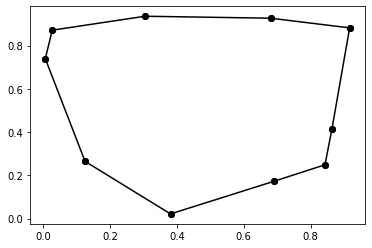

In [91]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

import matplotlib.pyplot as plt
#plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'ko-')
plt.show()

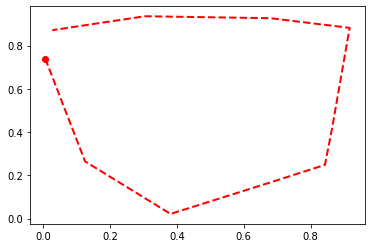

In [93]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

In [129]:
from shapely.geometry import Polygon
h=ConvexHull(list(Polygon(hull.points[hull.vertices]).exterior.coords))

In [127]:
hull.points[hull.vertices]

array([[0.00578136, 0.73981191],
       [0.12480793, 0.26450542],
       [0.38069519, 0.02136152],
       [0.69128538, 0.17285143],
       [0.84305387, 0.24863633],
       [0.86392729, 0.41450126],
       [0.91695498, 0.88229764],
       [0.68036499, 0.92701024],
       [0.30432812, 0.93608791],
       [0.02664019, 0.8716549 ]])

In [69]:
hull.nsimplex

8

In [131]:
h.points

array([[0.00578136, 0.73981191],
       [0.12480793, 0.26450542],
       [0.38069519, 0.02136152],
       [0.69128538, 0.17285143],
       [0.84305387, 0.24863633],
       [0.86392729, 0.41450126],
       [0.91695498, 0.88229764],
       [0.68036499, 0.92701024],
       [0.30432812, 0.93608791],
       [0.02664019, 0.8716549 ],
       [0.00578136, 0.73981191]])

### For check persistence across the years

In [3]:
from importlib import reload
import numpy as np
import pandas as pd
import kc_functions as kc

reload(kc)
df=kc.getalldata()
df=kc.removeNoHourAndMinutes(df)
df=kc.removeUnneededColumns(df)
df=kc.createTimestamp(df)
df['target']=df['drunk_dr']

/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kchuangk/.pyenv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [73]:
# Final for Tabpy - across time version

from scipy.spatial import Delaunay, ConvexHull
from scipy.stats import ttest_ind, ranksums
from scipy.spatial.qhull import QhullError
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
from shapely.vectorized import contains    # maker sure Cython package
import pandas as pd
import hdbscan

def in_hull(h,p):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    hull_in=Delaunay(h.points)
    return hull_in.find_simplex(p)>=0

# Assuming each row is unique
# TABPY LOCS = np.column_stack([np.radians(_arg1),np.radians(_arg2), _arg3])
def get_cluster_hulls_with_year(dftmp,year_selected,min_cluster_size=50):
    '''
    dftmp = full dataframe with with 'longitud','latitude','year' and 'target'
    year_selected = year selcted to get the clusters from
    
    Returns a dataframe with the significnat clusters, clusteres, p_values and t_stats
    It uses the Wilcoxon rank sum test. It is non-parametric.
    '''
    # ID is used to check the code, year is used to separate it by year - we can probably move this out of the function
    # for tabpy
    uniquedf=dftmp.loc[dftmp.year==year_selected,['longitud','latitude','target','year']]
    # uniquedf is the uniques
    targetdf = uniquedf.loc[uniquedf['target']==1,:]
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,metric="manhattan")
    #clusterer = hdbscan.HDBSCAN(min_cluster_size=5,gen_min_span_tree=True,metric="manhattan",min_samples=5)
    #clusterer = hdbscan.HDBSCAN(min_cluster_size=_arg4[1],gen_min_span_tree=True,metric="manhattan",min_samples=_arg5[1])
    clustered = clusterer.fit(targetdf.loc[:,['longitud','latitude']])
    targetdf['cluster']=clustered.labels_
    uniquedf['cluster']=0
    # relabel cluster 0 so when we multiply it out to indicate significant clusters, it works - adding 1 to everything
    uniquedf.loc[list(targetdf.index),'cluster']=clustered.labels_ + 1
    for i in uniquedf['cluster'].unique():
        if i!=0:
            dftgt=uniquedf.loc[uniquedf['cluster']==i,['longitud','latitude']]
            try:
                hull=ConvexHull(dftgt)
            except Exception as Err:
                hull=None
                if type(Err) == QhullError:
                    if len(dftgt.longitud.unique())<3 and len(dftgt.latitude.unique())<3:
                        for lon,lat in zip(dftgt.longitud.unique(),dftgt.latitude.unique()):
                            uniquedf.loc[(uniquedf.longitud==lon) & (uniquedf.latitude==lat),'cluster']==i
                    else:
                        print(Err.args)   # True error here - we'll have ot know about about it - not sure how you display it in tableau
            if hull is not None:
                hull.close()
                uniquedf.loc[in_hull(hull,uniquedf.loc[:,['longitud','latitude']].values),'cluster']=i
                uniquedf.loc[in_hull(hull,uniquedf.loc[:,['longitud','latitude']].values),'hull_vertices']=Polygon(hull.points[hull.vertices])
    # ttest - no need for any correction because it's different data sets
    dfnotincluster=uniquedf.loc[uniquedf['cluster']==0,'target']
    uniquedf['tstat']=-1
    uniquedf['pvalue']=-1
    for i in uniquedf['cluster'].unique():
        if i!=0:
            dfcluster=uniquedf.loc[uniquedf['cluster']==i,'target']
            tstat,pvalue=ranksums(dfcluster,dfnotincluster)
            uniquedf.loc[uniquedf['cluster']==i,'stat']=tstat
            uniquedf.loc[uniquedf['cluster']==i,'pvalue']=pvalue
    # now, check for significance
    uniquedf['sig']=uniquedf.pvalue<= 0.05
    uniquedf.loc[uniquedf.cluster==0,'sig']=False
    # TABPY uniquedf['sig']=uniquedf.pvalue<=_arg6[1]
    uniquedf['sig_cluster']=uniquedf.cluster*uniquedf.sig
    # add year to the clusters
    if uniquedf['cluster'].max()>99:
        print("Too many clusters'")
        return -1
    uniquedf['cluster']=year_selected+uniquedf['cluster']/100
    uniquedf['sig_cluster']=year_selected+uniquedf['sig_cluster']/100
    return uniquedf

# get hulls for each year

# df should consist of columns - longitud, latitude, target and year
dfmain=df.loc[:,['longitud','latitude','target','year']]
years=dfmain.year.unique()
min_cluster_size=50
dfprim=None
for i in years:
    if dfprim is None:
        dfprim=get_cluster_hulls_with_year(dfmain,i,min_cluster_size)
    else:
        dfprim=dfprim.append(get_cluster_hulls_with_year(dfmain,i,min_cluster_size))

# find the intersection of hulls for each year
p=None
for j in years:
    l=[]
    for i in dfprim.loc[(dfprim.year==j) & (dfprim.sig_cluster % 1 !=0),'sig_cluster'].unique():
        l.append(dfprim.loc[dfprim.sig_cluster==i,'hull_vertices'].head(1).values[0])
    if p is None:
        p=cascaded_union(l)
    else:
        p=p.intersection(cascaded_union(l))

dfprim['sig_cluster_across_time']=0
# create clusters for each point
for i in range(len(p)):
    dfprim.loc[contains(p[i],dfprim.longitud,dfprim.latitude),'sig_cluster_across_time']=i+1

        
# PLEASE READ: basically cluster 0 means it's not a cluster - everythign else, it's in a cluster
# fulldf has every single point (repeated) - cluster is the cluster it is in 0 means not in a cluster or significant cluster, -2 means repeated
# uniquedf has only the unique points - sig_cluster is the significant cluster 0 means it's not in a cluster, cluster = cluster from hdbscan (no significance)
# return uniquedf['sig']

/home/kchuangk/.pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kchuangk/.pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kchuangk/.pyenv/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [79]:
sum(dfprim.sig_cluster_across_time!=0)

12685

,longitud,latitude,target,year,cluster,hull_vertices,tstat,pvalue,stat,sig,sig_cluster,sig_cluster_across_time
4819,-104.791356,39.638581,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4821,-105.053264,39.791053,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4822,-104.898806,39.874244,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4823,-104.981667,39.979928,1.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4824,-104.940622,39.720944,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4827,-104.090964,39.667556,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4828,-104.771825,39.824922,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4830,-104.597067,38.286614,0.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4831,-104.580833,38.286219,1.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2
4832,-104.984167,39.823056,1.0,2014.0,2014.03,"POLYGON ((-107.135 39.40544722, -106.23020556 ...",-1,0.010501,2.558864,True,2014.03,2


In [28]:
a=dfprim.loc[131586,'hull_vertices']

In [32]:
list(a.exterior.coords)

[(-105.73358611, 33.59848056),
 (-103.42018056, 39.87002222),
 (-104.9455, 41.9362),
 (-106.95638889, 40.43544444),
 (-108.43333333, 37.42944444),
 (-108.905975, 35.06365833),
 (-108.89733333, 35.04183056),
 (-105.73358611, 33.59848056)]

In [250]:
z=p[2014].intersection(p[2015]).intersection(p[2016]).intersection(p[2017])

In [266]:
p.area

27.320349072525485

In [290]:
len(p)

5

In [282]:
p[0].contains(Point([1,1],Point[2,2]))

TypeError: 'type' object is not subscriptable

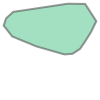

In [294]:
p[0]